RMSE: 0.22


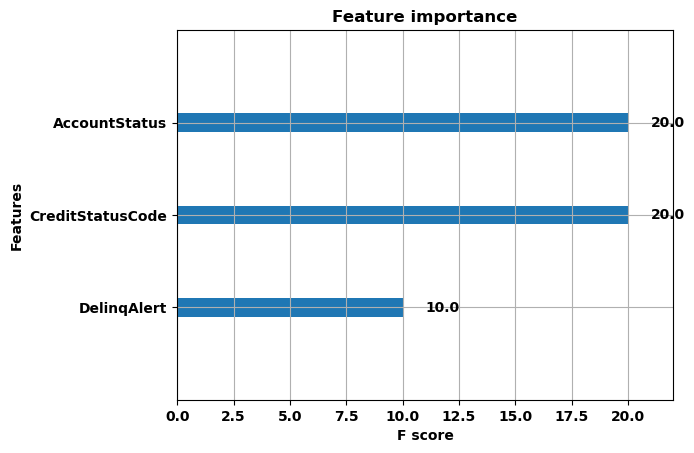

In [11]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('ATB_EC_MM_sample_regression.csv')

# Divide the DataFrame into features and target
X = df.drop(['PartyCode', 'BadDebtor'], axis=1)
y = df['BadDebtor']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set hyperparameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Train model
model = xgb.train(params, dtrain, num_boost_round=10)

# Make predictions
predictions = model.predict(dtest)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse:.2f}')

# Plot feature importance
xgb.plot_importance(model)
plt.show()